In [4]:
import numpy
import sklearn
import pandas as pd

print(numpy.__version__)
print(sklearn.__version__)


1.26.4
1.4.2


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [6]:
df = pd.read_csv('C:\\Projects\\mlproject\\notebooks\\data\\StudentsPerformance.csv')

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
X=df.drop('math score', axis=1)
y=df['math score']

In [10]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [13]:
#create column transformer with 3 types of transformers: numerical, categorical, and binary
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    [ ('OneHotEncoder', oh_transformer, cat_features),
      ('StandardScaler', numeric_transformer, num_features)
    ])

In [14]:
X=preprocessor.fit_transform(X)

In [16]:
X.shape

(1000, 19)

In [17]:
#seperate dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [18]:
#create a function to evaluate model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [27]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False),

    'GradientBoostingRegressor':GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train, y_train) #train the model

#make predictions
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

#evaluate the model
model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print(list(models.keys())[i])
model_list.append(list(models.keys())[i])


print('model performance on training set')
print(f"MAE: {model_train_mae}")
print(f"MSE: {model_train_mse}")
print(f"RMSE: {model_train_rmse}")
print(f"R2 Score: {model_train_r2}")
print('-----------------------------------')
print('model performance on testing set')
print(f"MAE: {model_test_mae}")
print(f"MSE: {model_test_mse}")
print(f"RMSE: {model_test_rmse}")
print(f"R2 Score: {model_test_r2}")
r2_list.append(model_test_r2)
print('===================================')


GradientBoostingRegressor
model performance on training set
MAE: 3.722632404265115
MSE: 21.408568924292386
RMSE: 4.626939477050936
R2 Score: 0.9050396644022572
-----------------------------------
model performance on testing set
MAE: 4.312308558935725
MSE: 31.14495413572025
RMSE: 5.58076644697843
R2 Score: 0.8720097028018584


In [32]:
#compare model performance
model_performance=pd.DataFrame({'Model':model_list, 'R2 Score':r2_list})
model_performance.sort_values(by='R2 Score', ascending=True)


,Model,R2 Score
0,GradientBoostingRegressor,0.87201


In [33]:
#linear regression was the best model
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
score
print(f'R2 score of linear regression on test set: {score}')

R2 score of linear regression on test set: 0.8790464771743793


Text(0, 0.5, 'Predicted Values')

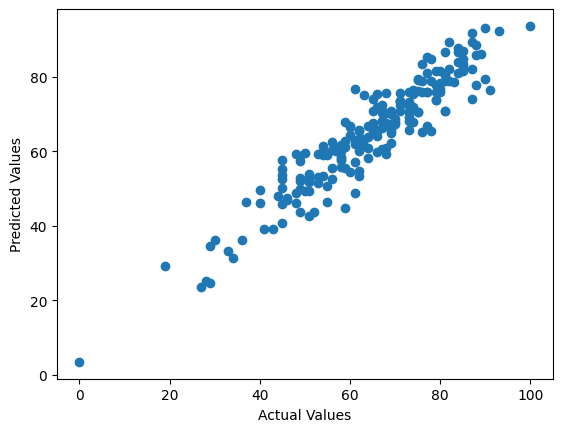

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


<Axes: xlabel='math score'>

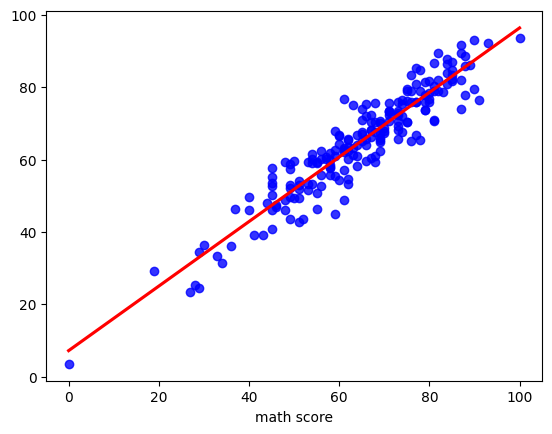

In [35]:
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [37]:
pred_df=pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred, 'difference':y_test - y_pred})
pred_df

,Actual Values,Predicted Values,difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
